# Assignment: Data Visualization with Haberman Dataset

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
survival status (class attribute) -- 1 = the patient survived 5 years or longer -- 2 = the patient died within 5 year


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('haberman.csv')

In [3]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data.shape

(306, 4)

In [5]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# 2-D scatter plot

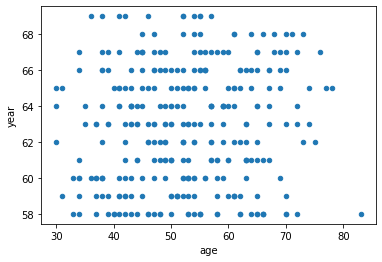

In [7]:
data.plot(kind='scatter', x='age', y='year') ;
plt.show()

### observation :
    
1) year of operation varies 58 to 67 or 68

2)age varies from 30 to 85     

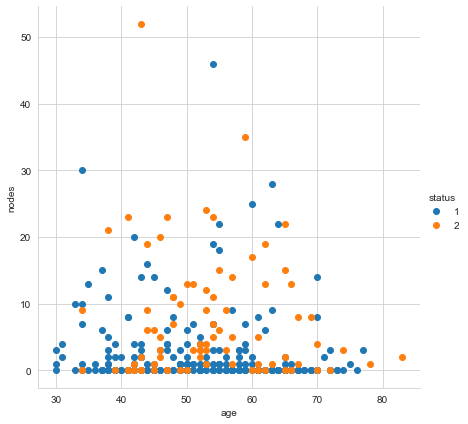

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", size=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();


In [9]:
data['nodes'].value_counts()[:10]

0    136
1     41
2     20
3     20
4     13
6      7
7      7
8      7
5      6
9      6
Name: nodes, dtype: int64

### Observation:

1) Many of the data points having the nodes equal to 0 or 1.

2) From the plot we can say that most of the nodes detected were less than 10 in number

3) After age 70, nodes value never exceeds 5

# Pair Plots

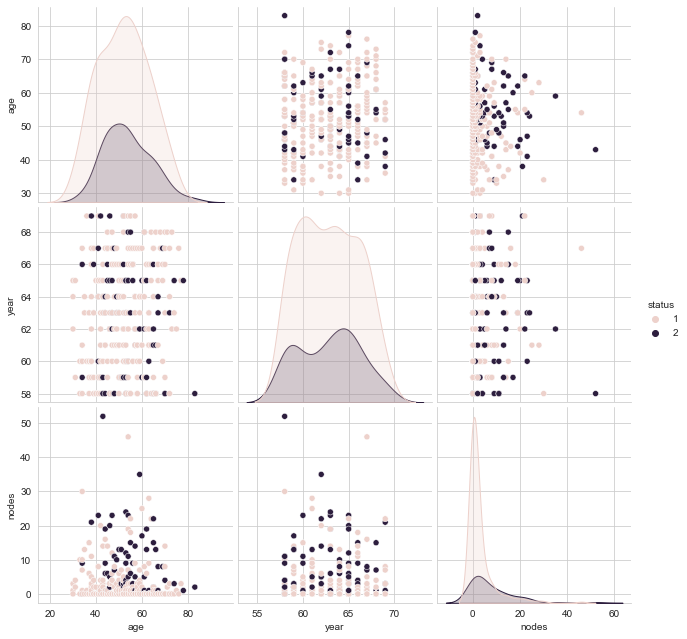

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", size=3);
plt.show()

### Observations :
    
The overlap between two classes is more based on year and age, based on nodes it is less

# 1D plotting
Histogram

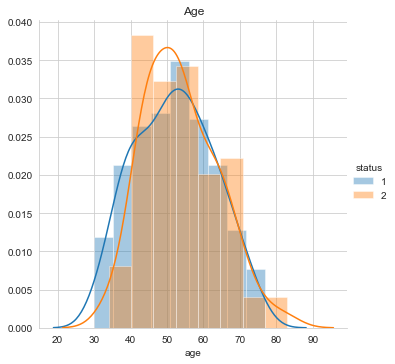

In [11]:
sns.FacetGrid(data, hue = 'status', size = 5)\
    .map(sns.distplot, 'age')\
    .add_legend()
plt.title('Age')
plt.show()

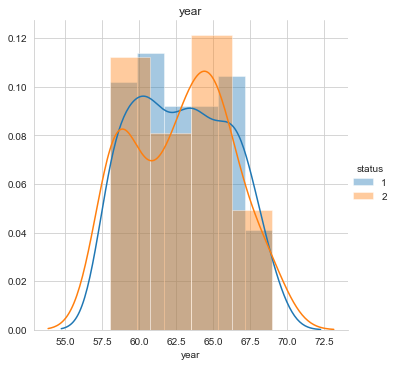

In [12]:
sns.FacetGrid(data, hue = 'status', size = 5)\
    .map(sns.distplot, 'year')\
    .add_legend()
plt.title('year')
plt.show()

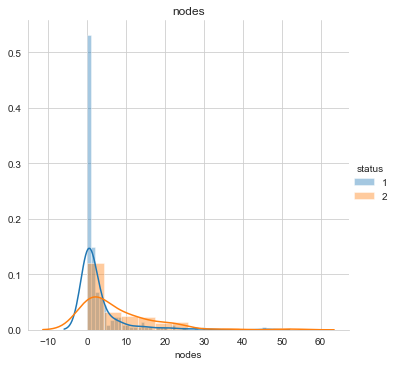

In [13]:
sns.FacetGrid(data, hue = 'status', size = 5)\
    .map(sns.distplot, 'nodes')\
    .add_legend()
plt.title('nodes')
plt.show()


### observations

1) most nodes values are between 0 to 10

# CDF

In [14]:
class1 = data.loc[data["status"] == 1];
class2 = data.loc[data["status"] == 2];

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


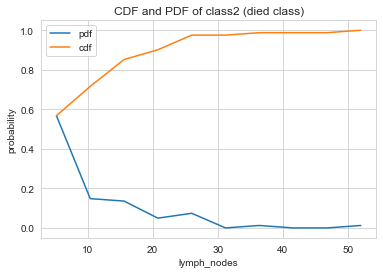

In [15]:
counts, bin_edges = np.histogram(class2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('CDF and PDF of class2 (died class)')
plt.xlabel('lymph_nodes')
plt.ylabel('probability')

plt.legend()
plt.show();

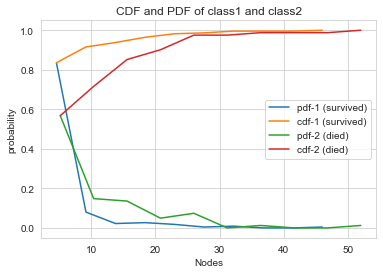

In [16]:
counts, bin_edges = np.histogram(class1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))


cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-1 (survived)');
plt.plot(bin_edges[1:], cdf, label='cdf-1 (survived)')


counts, bin_edges = np.histogram(class2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))


cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-2 (died)');
plt.plot(bin_edges[1:], cdf, label='cdf-2 (died)')
plt.title('CDF and PDF of class1 and class2')
plt.xlabel('Nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


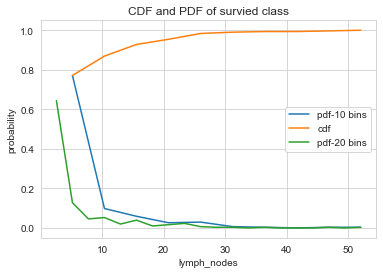

In [17]:
counts, bin_edges = np.histogram(data['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-10 bins');
plt.plot(bin_edges[1:], cdf, label='cdf')


counts, bin_edges = np.histogram(data['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, label='pdf-20 bins');
plt.title('CDF and PDF of survied class')
plt.xlabel('lymph_nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

### Observations:

People with the nodes less than 8 are having high chances of survival(i.e class1)

# Box Plots

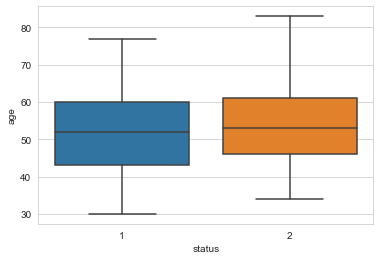

In [18]:
sns.boxplot(x='status',y='age', data=data)
plt.show()

### Observations:

for class1,

75% datapoints are of age less than 60 year 

50% datapoints are of age less than 53 year 

25% datapoints are of age less than 44 year 

for class2,

75% datapoints are of age less than 62 year

50% datapoints are of age less than 54 year 

25% datapoints are of age less than 47 year 

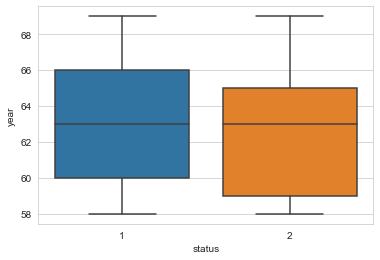

In [19]:
sns.boxplot(x='status',y='year', data=data)
plt.show()

### Observations:

for class1,

75 percentile is the year 66 

50 percentile is the year 63 

25 percentile is the year 60 

for class2,

75 percentile is year 65 

50 percentile is the year 63

25 percentile is the year 59

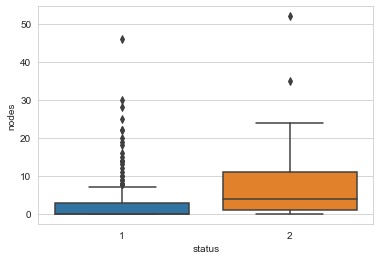

In [20]:
sns.boxplot(x='status',y='nodes', data=data)
plt.show()

### Observations

75 percentile is at below 4 
that means 75% of datapoints are below 4 nodes for class1(survived)


# Violin Plots

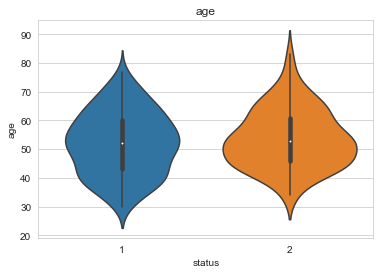

In [21]:
sns.violinplot(x = 'status', y = 'age', data = data)
plt.title('age')
plt.show()


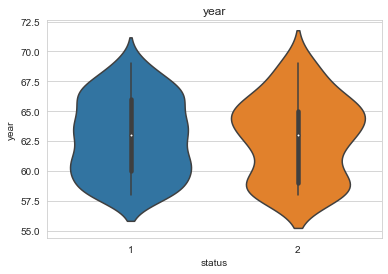

In [22]:
sns.violinplot(x = 'status', y = 'year', data = data)
plt.title('year')
plt.show()


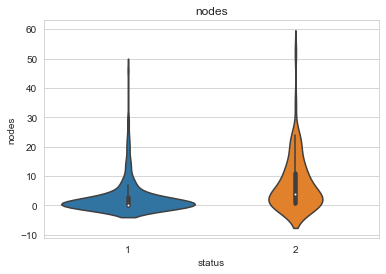

In [23]:
sns.violinplot(x = 'status', y = 'nodes', data = data)
plt.title('nodes')
plt.show()


### Observations :
    
We are getting same observations from violin plot as we previously got in boxplot

# Conclusions

### From pair plots,

1)The overlap between two classes is more based on year and age, based on nodes it is less.

2) we can use 'if-else' conditions to build a simple model to classify the patient types.

### From Box plot for nodes 

1) 75% of survived people having nodes in the range between 0 to 4